# Gamma function and Gamma distribution
ref1: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html

ref2: https://mathworld.wolfram.com/GammaFunction.html

ref3: https://docs.scipy.org/doc/scipy/tutorial/stats.html

The (complete) gamma function Gamma(n) is defined to be an extension of the factorial to complex and real number arguments. It is related to the factorial by

 $$\Gamma(n)=(n-1)!$$
a slightly unfortunate notation due to Legendre which is now universally used instead of Gauss's simpler $\Pi(n)=n!$ (Gauss 1812; Edwards 2001, p. 8).

Gamma function is defined as:
$$ \Gamma(z) = \int_{0}^{\infty}t^{z-1}e^{-t}dt $$
for $R(z)>0$ and is extended to the rest of the complex plane by analytic continuation. See [NIST Digital Library of Mathematical Functions https://dlmf.nist.gov/5.2#E1] for more details.



In [1]:
%matplotlib inline
import numpy as np
from scipy.special import gamma, factorial # Don't be confused with scipy.stats.gamma
from matplotlib import pyplot as plt

In [11]:
for k in range(1,10):
    print('factorial({0}) = {1}, gamma({2}) = {3}'.format(k,factorial(k),k+1,gamma(k+1)))

factorial(1) = 1.0, gamma(2) = 1.0
factorial(2) = 2.0, gamma(3) = 2.0
factorial(3) = 6.0, gamma(4) = 6.0
factorial(4) = 24.0, gamma(5) = 24.0
factorial(5) = 120.0, gamma(6) = 120.0
factorial(6) = 720.0, gamma(7) = 720.0
factorial(7) = 5040.0, gamma(8) = 5040.0
factorial(8) = 40320.0, gamma(9) = 40320.0
factorial(9) = 362880.0, gamma(10) = 362880.0


In [27]:
X = np.arange(0,10,0.4)
Y1 = factorial(X)
Y2 = gamma(X+1)

for x,y1,y2 in zip(X,Y1,Y2):
    print('factorial({0}) = {1}'.format(x,y1))    
    assert(y1==y2), f"y1 should be equal to y2, got: {y1} and {y2}"


factorial(0.0) = 1.0
factorial(0.4) = 0.8872638175030753
factorial(0.8) = 0.9313837709802426
factorial(1.2000000000000002) = 1.101802490879713
factorial(1.6) = 1.4296245588603045
factorial(2.0) = 2.0
factorial(2.4000000000000004) = 2.981206426810334
factorial(2.8000000000000003) = 4.694174205740425
factorial(3.2) = 7.75668953579318
factorial(3.6) = 13.381285870932443
factorial(4.0) = 24.0
factorial(4.4) = 44.5988481450826
factorial(4.800000000000001) = 85.62173751270541
factorial(5.2) = 169.4060994617231
factorial(5.6000000000000005) = 344.7019240352203
factorial(6.0) = 720.0
factorial(6.4) = 1541.336191894055
factorial(6.800000000000001) = 3376.9213275011025
factorial(7.2) = 7562.288279971303
factorial(7.6000000000000005) = 17290.248509606685
factorial(8.0) = 40320.0
factorial(8.4) = 95809.45768813447
factorial(8.8) = 231791.87991967567
factorial(9.200000000000001) = 570499.0278410374
factorial(9.600000000000001) = 1427482.916953128


scipy.special.factorial(n, exact=False)[source]

exact bool, optional. If True, calculate the answer exactly using long integer arithmetic. If False, result is approximated in floating point rapidly using the gamma function. Default is False.

实际上，scipy中factorial()在参数exact=False时是用gamma()来进行近似计算的(当然要注意：factorial(n)=gamma(n+1))。当exact指定为True时，factorial是计算严格的非负整数的阶乘，此时它只能接收整型输入参数。如果给它非整型数会报错。



In [34]:
X = np.arange(0,2,0.4)
print(factorial(X,exact=False))
print(factorial(X,exact=True))

[1.         0.88726382 0.93138377 1.10180249 1.42962456]


ValueError: factorial() only accepts integral values

In [35]:
def gamma(x, a, b):
    c = (b ** a) / gamma_function(a)
    y = c * (x ** (a - 1)) * np.exp(-b * x)
    return x, y, np.mean(y), np.std(y)

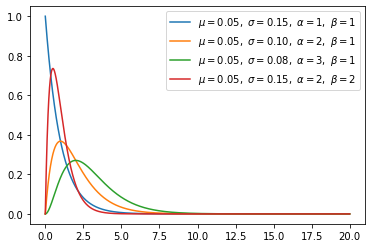

In [36]:
for ls in [(1, 1), (2, 1), (3, 1), (2, 2)]:
    a, b = ls[0], ls[1]

    x = np.arange(0, 20, 0.01, dtype=float)
    x, y, u, s = gamma(x, a=a, b=b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()
plt.savefig('graph/gamma.png')
plt.show()